In [1]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

# import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *
from py_common.bounds_dependence import *

In [2]:
def bounds_loss(bounds, bounds_true):
    chi = 0
    for i, b in enumerate(bounds_true):
        if i >= len(bounds):
            chi += 1
        else:
            chi += (np.log2(bounds[i] / b))**2
    chi /= i # type: ignore
    
    return chi

def bounds_losses(bounds, bounds_true):
    fields = np.unique(bounds.data[:, 0])

    losses = []
    for bounds_single in bounds.fields():
        losses.append(bounds_loss(bounds_single[:, 1], bounds_true))

    return np.array([np.array(fields), np.array(losses)])

# N_max = 175, potential scaling

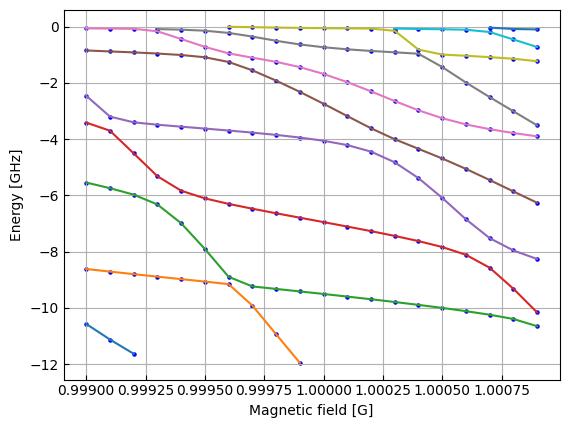

In [33]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_max_175_zoom.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.scatter(state[:, 0], state[:, 1], color="blue", s=5)
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]");
# ax.set_ylim(-1, 0);

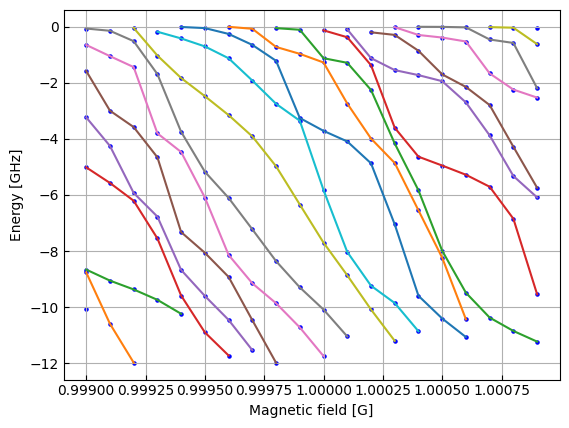

In [34]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_singlet_n_max_175_zoom.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.scatter(state[:, 0], state[:, 1], color="blue", s=5)
	ax.plot(state[:, 0], state[:, 1])
	
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]");
# ax.set_ylim(-1, 0);

# Bound states hifi

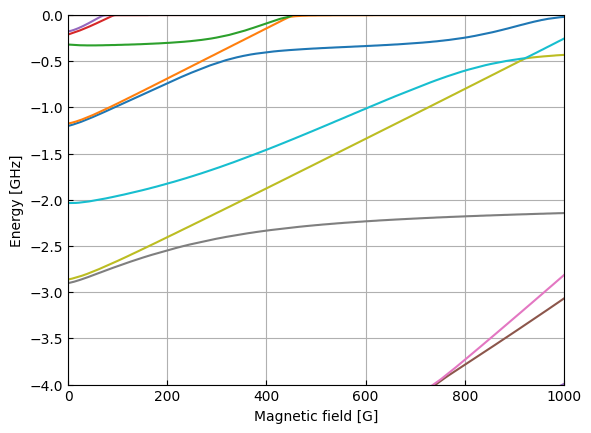

In [6]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_n_tot_max_0.json")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-4, 0);

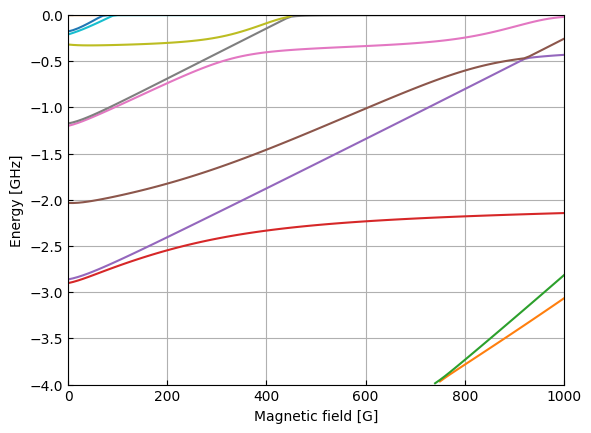

In [7]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_2.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-4, 0);

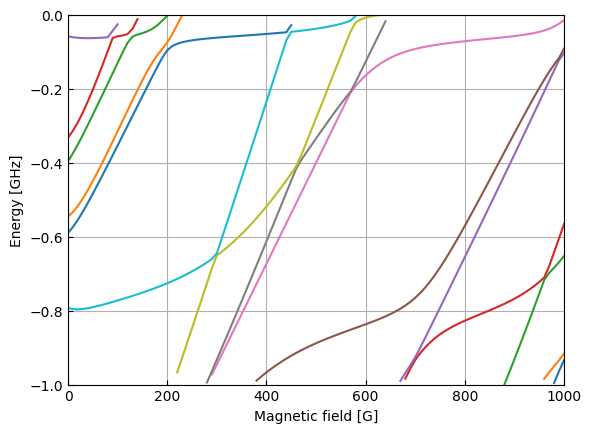

In [24]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_n_10.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1])
ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Magnetic field [G]")
ax.set_xlim(0, 1000)
ax.set_ylim(-1, 0);

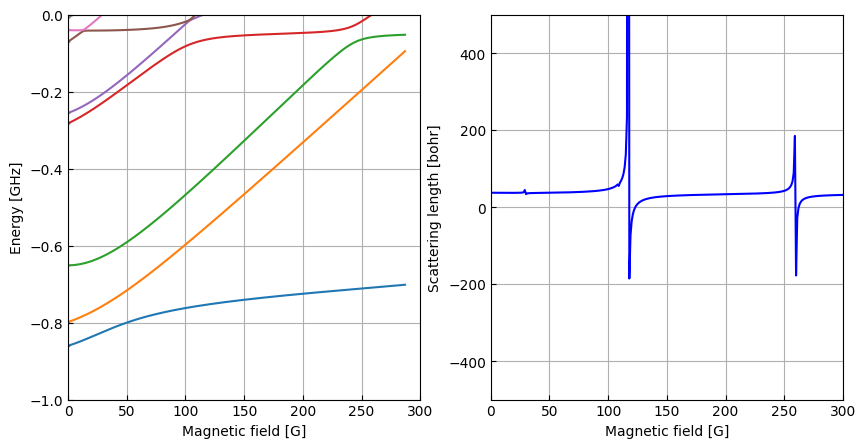

In [6]:
fig, axes = utility.plot_many(1, 2, shape=(10, 5))

bounds_single = BoundsDependence(f"{DATA_PATH}/bound_n_max_175.dat")
for state in bounds_single.states():
	axes[0].plot(state[:, 0], state[:, 1])
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_xlim(0, 300)
axes[0].set_ylim(-1, 0);

filename = f"{DATA_PATH}/molscat_n_max_175.dat"
data = np.loadtxt(filename, delimiter="\t", skiprows=1)

axes[1].plot(data[:, 1], data[:, 2], color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_xlim(0, 300)
axes[1].set_ylim(-500, 500);

# N_max = 1, potential scaling

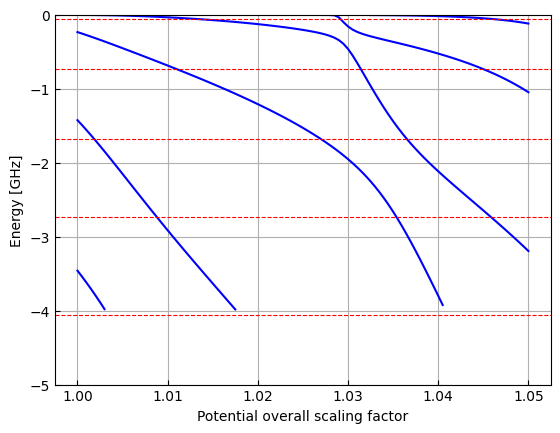

In [4]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_1_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_triplet.pdf")

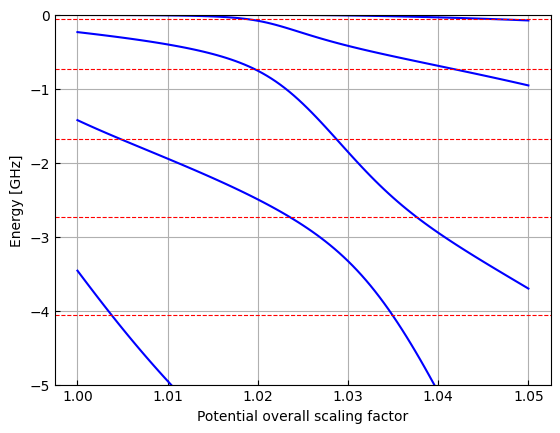

In [5]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_1_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_triplet.pdf")

# N_max = 5, potential scaling

Triplet

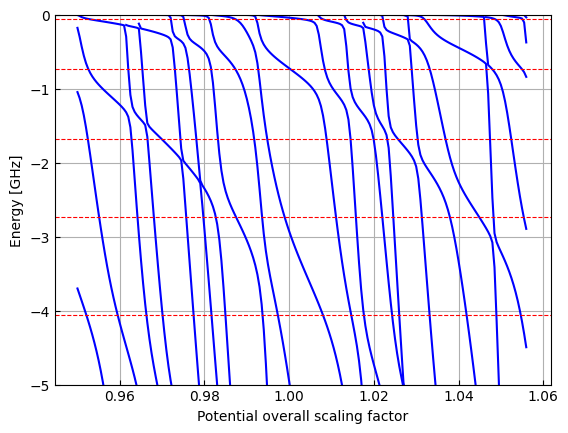

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_triplet.pdf")

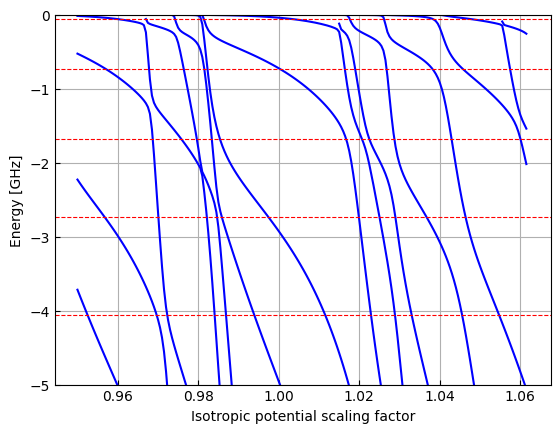

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_5_triplet.pdf")

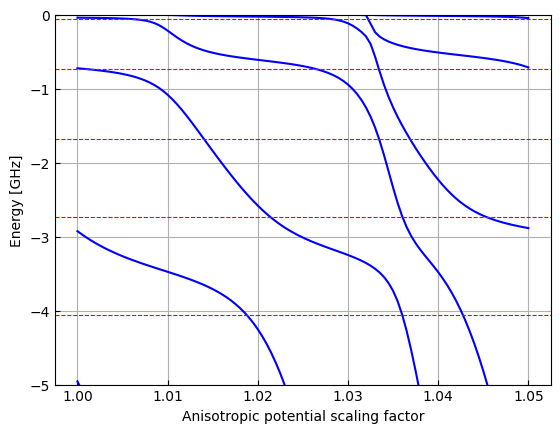

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_aniso_scaling_triplet_n_5.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Anisotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_aniso_scaling_n_5_triplet.pdf")

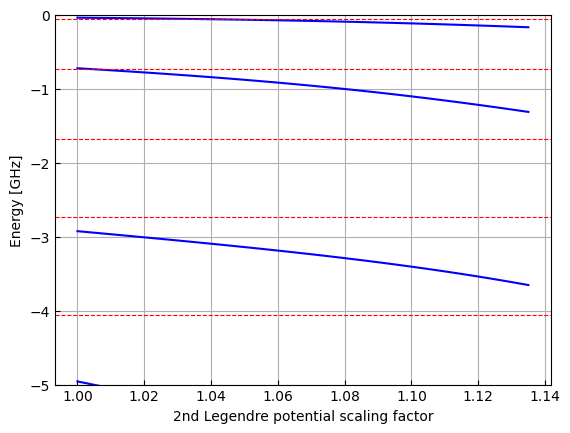

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_lambda_2_scaling_n_5_triplet_extended.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("2nd Legendre potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_lambda_2_scaling_n_5_triplet.pdf")

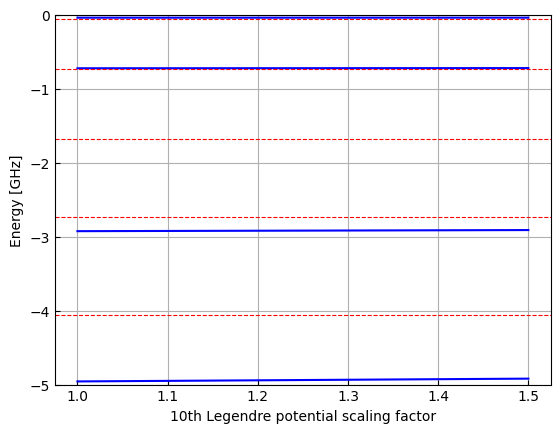

In [55]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_lambda_10_scaling_n_5_triplet_extended.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("10th Legendre potential scaling factor")
ax.set_ylim(-5, 0);
fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_lambda_10_scaling_n_5_triplet.pdf")

Singlet

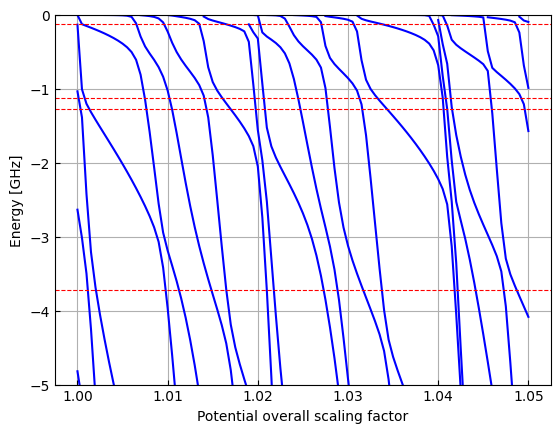

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_5_singlet.pdf")

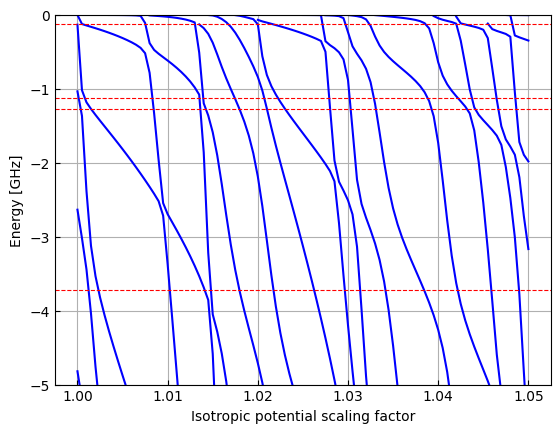

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_5_singlet.pdf")

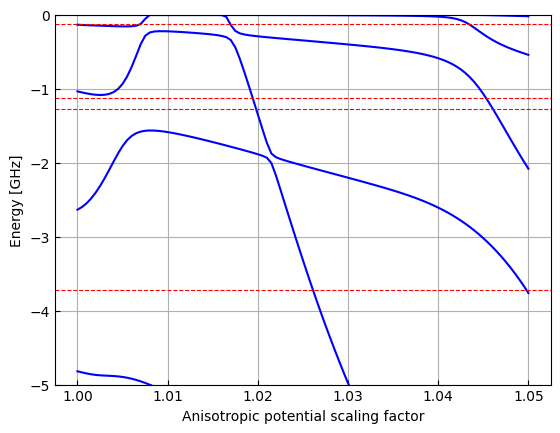

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_aniso_scaling_singlet_n_5.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Anisotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_aniso_scaling_n_5_singlet.pdf")

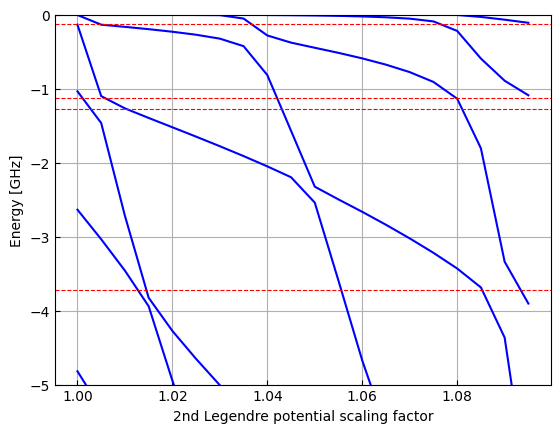

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_lambda_2_scaling_n_5_singlet_extended.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("2nd Legendre potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_lambda_2_scaling_n_5_singlet.pdf")

# N_max = 10, potential scaling

Triplet

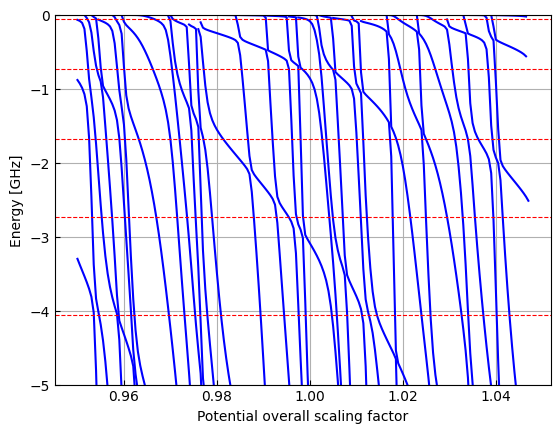

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_10_triplet.pdf")

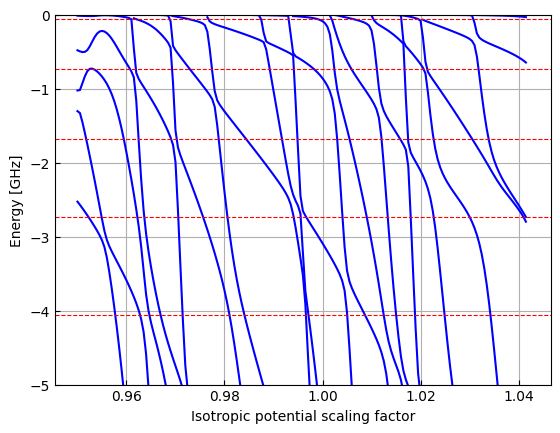

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_10_triplet.pdf")

Singlet

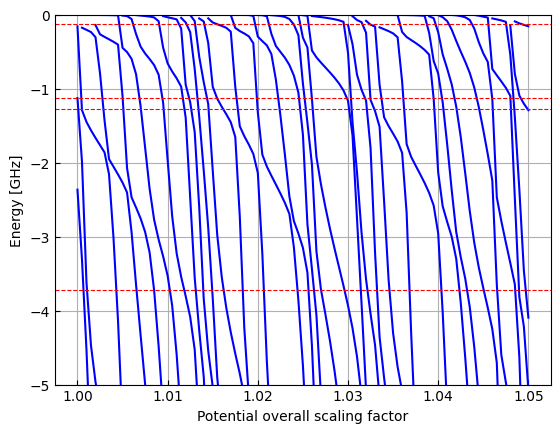

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_scaling_n_10_singlet.pdf")

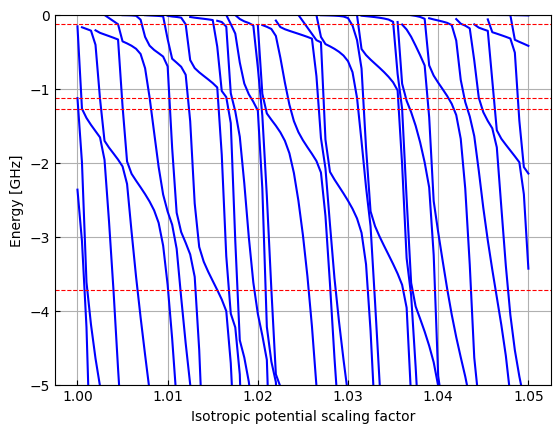

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Isotropic potential scaling factor")
ax.set_ylim(-5, 0);
# fig.savefig(f"{SAVE_PATH}/srf_rb_bounds_iso_scaling_n_10_singlet.pdf")

# Chi^2

Triplet

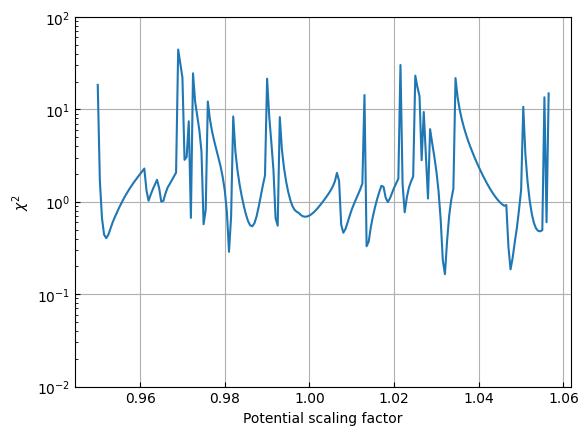

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_5_triplet.pdf")

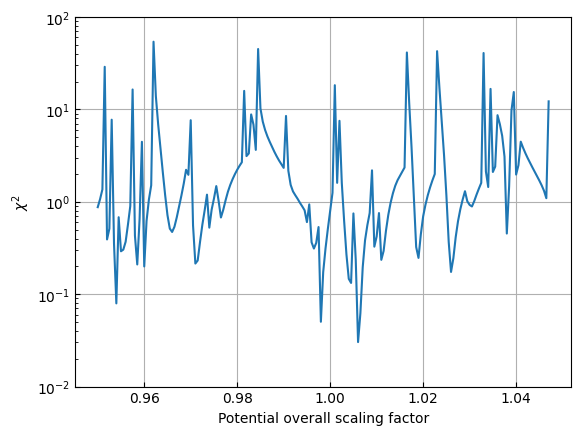

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential overall scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_10_triplet.pdf")

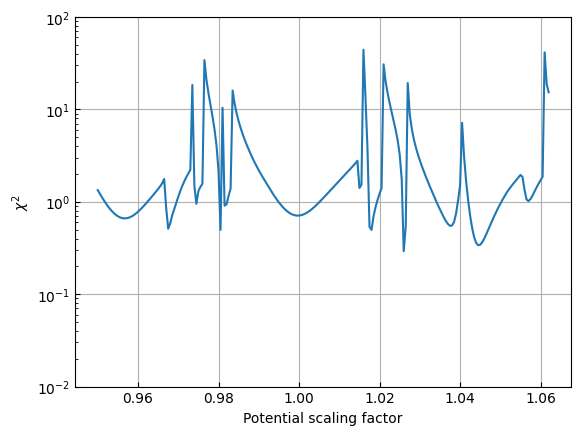

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_5_triplet.pdf")

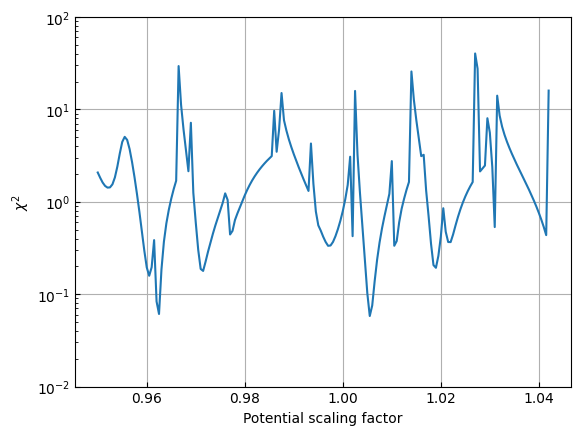

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_triplet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_10_triplet.pdf")

Singlet

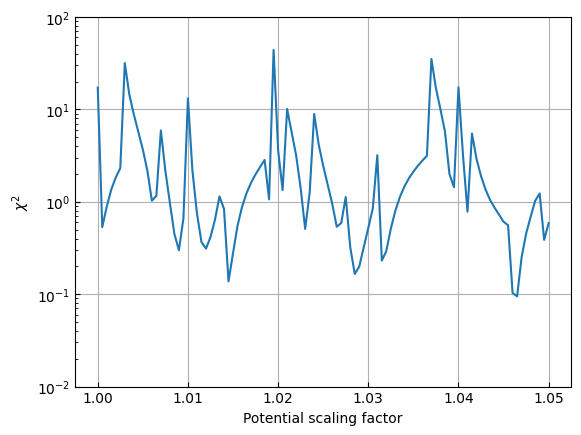

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scale_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_5_singlet.pdf")

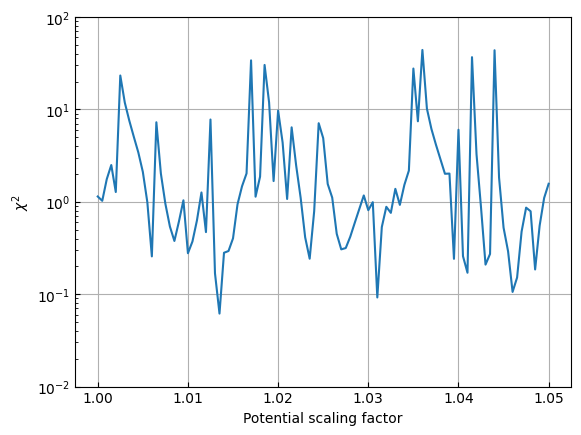

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_scaling_n_10_singlet.pdf")

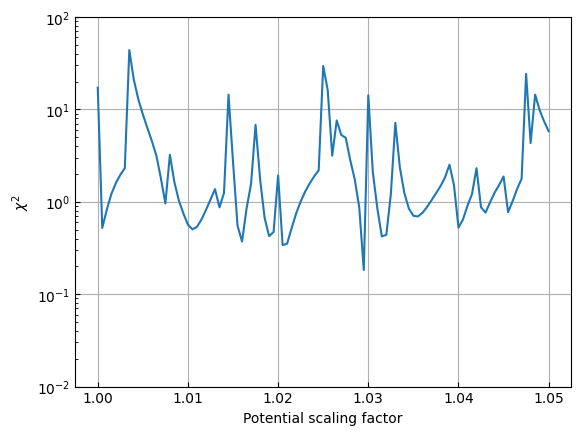

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_5_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_5_singlet.pdf")

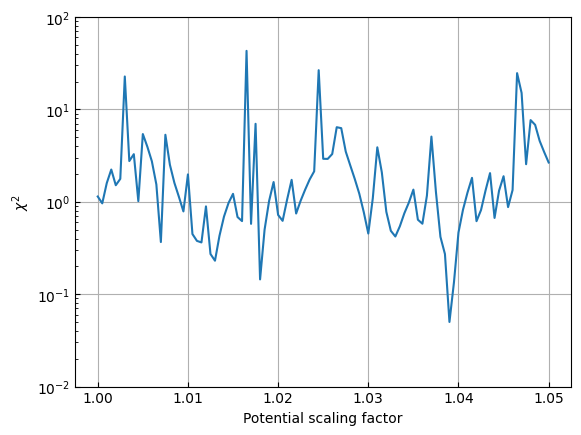

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/srf_rb_bounds_iso_scaling_n_10_singlet.dat")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")[::-1][0:5]

chi2 = bounds_losses(bounds_single, reference)

fig, ax = utility.plot()

ax.plot(chi2[0, :], chi2[1, :])
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)

ax.set_ylabel(r"$\chi^2$")
ax.set_xlabel("Potential scaling factor");
# fig.savefig(f"{SAVE_PATH}/srf_rb_chi2_iso_scaling_n_10_singlet.pdf")

# Bound in rust

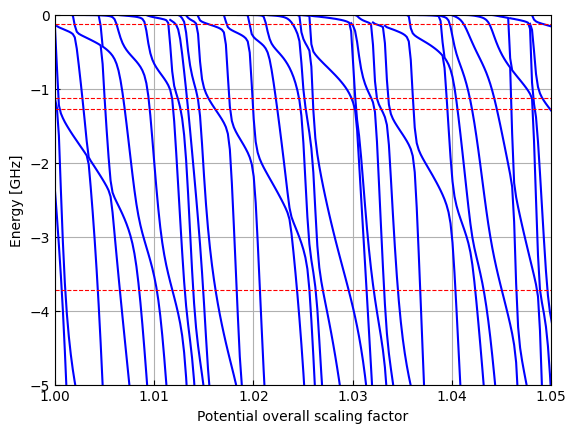

In [30]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")
ax.set_ylim(-5, 0);
ax.set_xlim(1., 1.05);

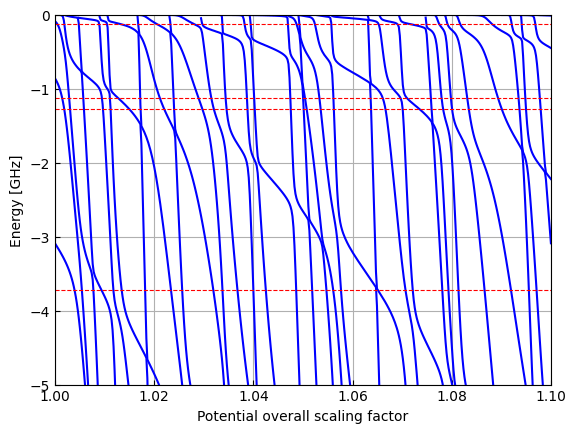

In [29]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_triplet_bound_states_n_max_10.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")

ax.set_ylim(-5, 0);
ax.set_xlim(1, 1.1);

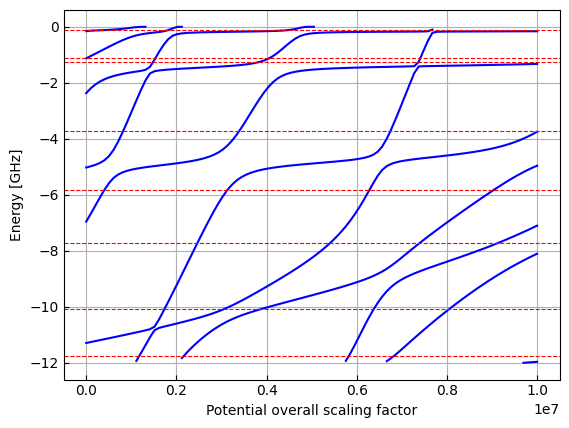

In [35]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10_shift_0.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor");

Text(0.5, 0, 'Potential overall scaling factor')

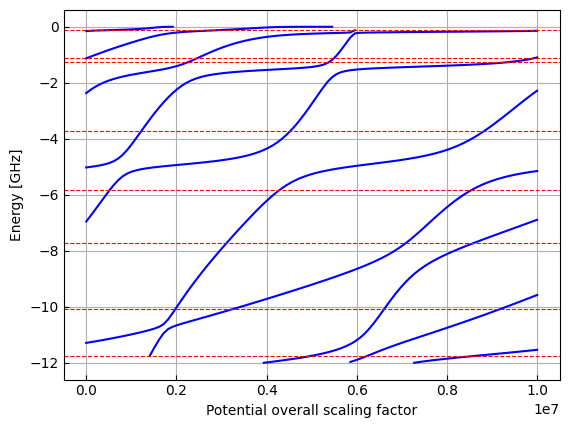

In [33]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10_shift_1.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")

Text(0.5, 0, 'Potential overall scaling factor')

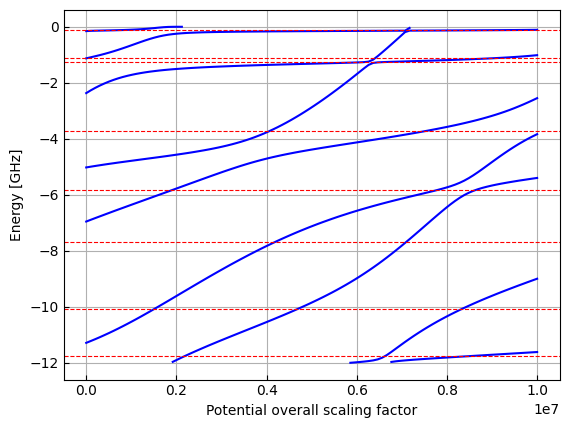

In [36]:
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_singlet_bound_states_n_max_10_shift_2.json")
reference = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")

fig, ax = utility.plot()

for state in bounds_single.states():
	ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference:
	ax.axhline(b, color = "red", linestyle="--", linewidth=0.8)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel("Potential overall scaling factor")